In [1]:
!unzip poses.zip

Archive:  poses.zip
   creating: poses/
   creating: poses/tree/
  inflating: poses/.DS_Store         
  inflating: __MACOSX/poses/._.DS_Store  
   creating: poses/down dog/
   creating: poses/warrior 2/
   creating: poses/plank/
   creating: poses/mountain/
  inflating: poses/tree/.DS_Store    
  inflating: __MACOSX/poses/tree/._.DS_Store  
   creating: poses/tree/train/
  inflating: poses/down dog/.DS_Store  
  inflating: __MACOSX/poses/down dog/._.DS_Store  
   creating: poses/down dog/train/
  inflating: poses/warrior 2/.DS_Store  
  inflating: __MACOSX/poses/warrior 2/._.DS_Store  
   creating: poses/warrior 2/train/
   creating: poses/plank/train/
  inflating: poses/mountain/.DS_Store  
  inflating: __MACOSX/poses/mountain/._.DS_Store  
   creating: poses/mountain/train/
  inflating: poses/tree/train/176.png  
  inflating: poses/tree/train/88.png  
  inflating: poses/tree/train/162.png  
  inflating: poses/tree/train/189.png  
  inflating: poses/tree/train/77.png  
  inflating: p

In [20]:
!git clone https://github.com/rwightman/posenet-pytorch
%cd posenet-pytorch

Cloning into 'posenet-pytorch'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 121 (delta 2), reused 1 (delta 0), pack-reused 115
Receiving objects: 100% (121/121), 37.79 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/posenet-pytorch/posenet-pytorch


In [21]:
import os
import cv2
import torch
import posenet
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
!pip install tfjs-graph-converter

In [23]:
import torch
from posenet.constants import *
from posenet.decode_multi import decode_multiple_poses
from posenet.models.model_factory import load_model
from posenet.utils import *

net = load_model(101)
net = net.cuda()
output_stride = net.output_stride
scale_factor = 1.0

Cannot find models file ./_models/mobilenet_v1_101.pth, converting from tfjs...


In [24]:
def posenet_model(file):
    input_image, draw_image, output_scale = posenet.read_imgfile(file, scale_factor=scale_factor, output_stride=output_stride)
    with torch.no_grad():
        input_image = torch.Tensor(input_image).cuda()

        heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = net(input_image)

        pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
            heatmaps_result.squeeze(0),
            offsets_result.squeeze(0),
            displacement_fwd_result.squeeze(0),
            displacement_bwd_result.squeeze(0),
            output_stride=output_stride,
            max_pose_detections=10,
            min_pose_score=0.25)

        #Find keypoints on the image
        image = plt.imread(file, format='jpeg')
        poses = []

        for pi in range(len(pose_scores)):
            if pose_scores[pi] != 0.:
                print('Pose #%d, score = %f' % (pi, pose_scores[pi]))
                keypoints = keypoint_coords.astype(np.int32)
                print(keypoints[pi])
                poses.append(keypoints[pi])

        #Show keypoints on the image
        img = plt.imread(file,format='jpeg')
        i=0
        pose = poses[0]
        plt.imshow(img)
        for y,x in pose:
            plt.plot(x, y, 'w.')
            plt.text(x, y, str(i), color='r', fontsize=10)
            i+=1
        plt.show()

In [25]:
file = '/content/poses/mountain/train/125.png'

In [26]:
from PIL import Image

def check_image_format(file_path):
    try:
        with Image.open(file_path) as img:
            print(f"Format of the image: {img.format}")
    except IOError:
        print("Unable to open the image file.")

# Provide the path to your image file
# image_file_path = "path/to/your/image.png"  # Change this to your image file's path
check_image_format(file)

Format of the image: JPEG


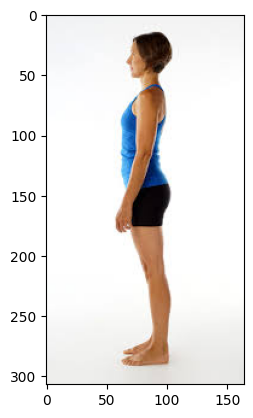

In [27]:
import matplotlib.pyplot as plt
img = plt.imread(file, format='jpeg')
plt.imshow(img)
plt.show()

Pose #0, score = 0.642003
[[ 37  62]
 [ 32  68]
 [ 31  67]
 [ 37  82]
 [ 36  72]
 [ 70  82]
 [ 64  93]
 [116  79]
 [114  79]
 [151  61]
 [149  66]
 [146  79]
 [146  87]
 [214  88]
 [214  89]
 [271  93]
 [270  91]]


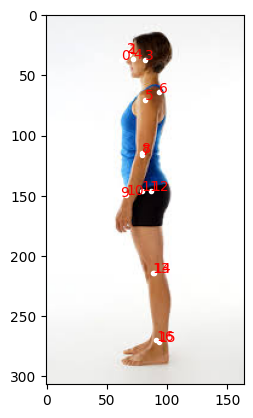

In [28]:
posenet_model(file)